# 1. Data Gathering

In [272]:
# import required libraries
import pandas as pd
import requests

In [273]:
df_archive = pd.read_csv('data/twitter-archive-enhanced.csv')

In [274]:
#this is only option b, ideally with requests library
#https://stackoverflow.com/questions/35371043/use-python-requests-to-download-csv
df_image = pd.read_csv('data/image-predictions.tsv', sep='\t')

In [275]:
# read in file with requests library
#import io

#url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
#s = requests.get(url).content
#df_image1 = pd.read_csv(io.StringIO(s.decode('utf-8')), sep='\t') 
#df_image1.head()

In [276]:
# read in json file
# https://stackoverflow.com/questions/30088006/loading-a-file-with-more-than-one-line-of-json-into-pythons-pandas
df_retweet = pd.read_json('data/tweet-json.txt', lines=True)

# 2. Data Assessment

## 2.1 Visual Assessment

In [277]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [278]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [279]:
df_retweet.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## 2.2 Programatic Assessment

In [280]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [281]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [282]:
df_retweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

## 2.3 Data Quality and Tidiness Issues
Important note: The issues initially refer to the original dataframes provided by Udacity. As you can see, these three original dataframes have their respective issues. Within the cleaning process, all three initial datasets have been merged to one master dataframe called 'df_archive_image_retweet'.

## Key Points from 'Project Motivation' and info from 'Project Details'
* df_archive contains original ratings and retweets. In fact, only original ratings (no retweets) are required **- solved**
* some of the original ratings don't have images, but we only want ratings with images **- solved**
* tweets beyond Aug. 1st 2017 don't have image predictions and we don't want to gather them **- solved**
* only concentrate on retweet and favorite count in df_retweet (see project details) **- solved**  


## Tidiness Issues
### df_archive (after cleaning: df_archive_image_retweet)
* each variable forms a column: rating_numerator and rating_denominator are actually one variable but separated in two columns (should be merged, ideally e.g. 8/10)**- solved**
* YES: each variable forms a column: for dog stage, there are four columns, they should be merged to one column called 'dog_stage' (datatype: category with values: None, doggo, floofer, pupper, puppo)**- solved**

### df_retweet (after cleaning: dr_retweet_counts1)
* each variable forms a column: Tweet ID appears in two columns: 'id' and 'id_str' **- solved**

## Quality Issues
### df_retweet (after cleaning: df_retweet_counts)
* YES: Tweet ID's in columns 'id' and 'id_str' are sometimes not the same **- solved**
* YES: Retweet_count for index 290 is 0 (should not be in this table) **- solved**

### df_retweet and df_image
* YES: tweet ID are listed in columns with different name: tweet_id (df_image) and 'id', 'id_str' (df_retweet) **- solved**

### df_image
* YES: datatype of p1, p2 and p3 is object and not category **- solved**

### df_archive (after cleaning: df_retweet_counts)
* YES: column 'expanded_urls‘ sometimes is wrong and starts with gofundme
* YES: data type of column 'timestamp' is object and not datetime **- solved**
* YES: Not every value of the column 'rating denominator' has value 10 **- solved**  
* YES: dogs sometimes are in two dog stages **- solved**


# 3. Data Cleaning

### Make copies of the dataframes

In [283]:
df_archive_clean = df_archive.copy()

In [284]:
df_image_clean = df_image.copy()

In [285]:
df_retweet_clean = df_retweet.copy()

### Issue: df_archive contains original ratings and retweets. In fact, only original ratings (no retweets) are required

#### Define
drop retweets from df_archive_clean.The column `retweeted_status_id` in this dataframe shows us those rows with retweets. I only keep those rows where the value of this column is NaN.

#### Coding

In [286]:
df_archive_clean1 = df_archive_clean[df_archive_clean['retweeted_status_id'].isnull()]

#### Testing

In [287]:
#how many retweets are included in df_archive_clean?
retweets_len = len(df_archive_clean[df_archive.retweeted_status_id.notnull()])
retweets_len

181

In [288]:
#The sum of retweets_len and df_archive_clean1 should equal the number of 
#rows of df_archive_clean
sum = len(df_archive_clean1) + retweets_len
sum

2356

In [289]:
len(df_archive_clean)

2356

### Issue: some of the original ratings don't have images, but we only want ratings with images

#### Define
We know that all those tweets and ratings, what have pictures, are stored in df_images_clean. I will merge the dataframes df_archive_clean1 and df_images_clean and only keep those id's what have images.

#### Code

In [290]:
#Merge both df's with 'inner', that means only those tweet_id's and their rows will be kept
#what appear in both table
#By doing that, we can guarantee, that we only keep ratings or tweets
#with images
df_merge_archive_image = pd.merge(df_archive_clean1, df_image_clean, how='inner', on='tweet_id')

#### Test

In [291]:
df_merge_archive_image.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [292]:
#the number of rows of df_merge_archive_image should be smaller or equal to
#number of rows of df_image_clean, because there are no more ratings
#with pictures
len(df_merge_archive_image)

1994

In [293]:
#the number of columns of df_merge_archive_image should be the sum of
#the number of df_archive_clean1 and df_image_clean, minus 1, because
#we only keep one column for tweet_id
A = len(list(df_merge_archive_image))
B = len(list(df_archive_clean1)) + len(list(df_image_clean)) - 1
print(A)
print(B)

28
28


### Issue: tweets beyond Aug. 1st 2017 don't have image predictions and we don't want to gather them

#### Define
Check if there are rows with a timestamp beyond Aug. 1st 2017 in df_merge_archive_image. If yes, these rows should be deleted.

#### Code

In [294]:
df_merge_archive_image.timestamp.sort_values().tail()

4    2017-07-29 16:00:24 +0000
3    2017-07-30 15:58:51 +0000
2    2017-07-31 00:18:03 +0000
1    2017-08-01 00:17:27 +0000
0    2017-08-01 16:23:56 +0000
Name: timestamp, dtype: object

#### Test
As we can see from the code output above, there are no ratings/tweets with a timestamp beyond Aug. 1st 2017, that is logical, because we already merged the dataframes df_archive_clean1 and df_image_clean and only considered tweet ID's for ratings/tweets with pictures. For these pictures, there are also predictions available.

### Issue: only concentrate on retweet and favorite count in df_retweet (see project details)

#### Define
Drop alle rows from df_retweet_clean except 'id', 'id_str', 'retweet_count', 'favorite_count'

#### Code

In [295]:
# from df_retweet_clean, choose columns 'id', 'id_str' and 'favorite count'
df_retweet_counts = df_retweet_clean[['id', 'id_str', 'retweet_count', 'favorite_count']]


#### Test

In [296]:
#see if required columns are kept, using head(1)
df_retweet_counts[288:293]

,id,id_str,retweet_count,favorite_count
288,838201503651401729,838201503651401728,11525,0
289,838150277551247360,838150277551247360,370,1824
290,838085839343206401,838085839343206400,0,150
291,838083903487373313,838083903487373312,3582,19183
292,837820167694528512,837820167694528512,8952,37277


### Issue: Retweet_count for index 290 is 0 (should not be in this table)

#### Define
Only keep rows where value of retweet_count does not equals 0.

#### Code

In [297]:
df_retweet_counts1 = df_retweet_counts[df_retweet_counts.retweet_count != 0]

#### Test

In [298]:
#Output should be zero.
len(df_retweet_counts1[df_retweet_counts1['retweet_count']==0])

0

### Issue: 
### A) Tidiness Issue: each variable forms a column: Tweet ID appears in two columns: 'id' and 'id_str'
### B) Quality issue: Tweet ID's in columns 'id' and 'id_str' are sometimes not the same

#### Define
Compare the id's of the columns 'tweet_id' (from df_merge_archive_image), 'id' and 'id_str' (df_retweet_counts1) with the following steps. We want to see if the id's from the column 'id' or 'id_str' are equal to the column 'tweet_id'.<br> 
1) rename 'id' (from df_retweet_counts1) to 'tweet_id' and merge it with the tweet_id (from df_merge_archive_image) to dataframe df_test1.<br> 
2) Get number of rows from df_test1<br>
3) Rename 'tweet_id' back to 'id' and rename 'id_str' to 'tweet_id' (from df_retweet_counts1) and merge it with the tweet_id (from df_merge_archive_image) to dataframe df_test2.<br>
4) Get number of rows from df_test2<br>
5) Check which df (df_test1 or test2) has more rows<br>
6) If df_test1 has more rows, delete 'tweet_id' (from df_retweet_counts1) and rename 'id' to 'tweet_id'. Then merge the df's df_retweet_counts1 and df_merge_archive_image on the column 'tweet_id'.<br>
7) If df_test2 has more rows, delete 'id' and rename 'id_str' to 'tweet_id'. Then merge the df's df_retweet_counts1 and df_merge_archive_image on the column 'tweet_id'.<br> 
 

#### Code and Test
To solve this issue, coding and testing steps are conducted consecutively.

In [299]:
#rename columns
df_retweet_counts1 = df_retweet_counts1.rename(columns={'id':'tweet_id'})

In [300]:
#test if renaming was successful
df_retweet_counts1.head(1)

,tweet_id,id_str,retweet_count,favorite_count
0,892420643555336193,892420643555336192,8853,39467


In [301]:
#merge df's df_merge_archive_image and df_retweet_counts1  
#on 'tweet_id' to dataframe df_test1 
df_test1 = pd.merge(df_merge_archive_image, df_retweet_counts1, how='inner', on='tweet_id')

In [302]:
#Get number of rows from df_test1
len(df_test1)

1994

In [303]:
#Rename 'tweet_id' back to 'id' and rename 'id_str' to 'tweet_id' 
#(from df_retweet_counts1) 
df_retweet_counts1.rename(columns={'tweet_id':'id'}, inplace=True)

In [304]:
#test if renaming was successful
df_retweet_counts1.head(1)

,id,id_str,retweet_count,favorite_count
0,892420643555336193,892420643555336192,8853,39467


In [305]:
#Rename 'id_str' to 'tweet_id' 
df_retweet_counts1.rename(columns={'id_str':'tweet_id'}, inplace=True)

In [306]:
#test if renaming was successful
df_retweet_counts1.head(1)

,id,tweet_id,retweet_count,favorite_count
0,892420643555336193,892420643555336192,8853,39467


In [307]:
#merge df's df_merge_archive_image and df_retweet_counts1  
#on 'tweet_id' to dataframe df_test1 
df_test2 = pd.merge(df_merge_archive_image, df_retweet_counts1, how='inner', on='tweet_id')

In [308]:
#Get number of rows from df_test1
len(df_test2)

1300

In [309]:
#df_test1 has more rows, so I delete 'tweet_id' from df_retweet_counts1
#and rename 'id' to 'tweet_id'. Then merge the df's df_retweet_counts1 and 
#df_merge_archive_image on the column 'tweet_id' to df_archive_image_retweet
df_retweet_counts1.drop(['tweet_id'], axis=1, inplace=True)
df_retweet_counts1 = df_retweet_counts1.rename(columns={'id':'tweet_id'})
df_archive_image_retweet = pd.merge(df_merge_archive_image, df_retweet_counts1, how='inner', on='tweet_id')

In [310]:
#Test:
#the number of columns of df__archive_image_retweet should be the sum of
#the number of df_merge_archive_image and df_retweet_counts1, minus 1, because
#we only keep one column for tweet_id
A = len(list(df_archive_image_retweet))
B = len(list(df_merge_archive_image)) + len(list(df_retweet_counts1)) - 1
print(A)
print(B)

30
30


In [311]:
#Test: Check if the column 'tweet_id' still exists
df_archive_image_retweet.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.07611,False,8853,39467


In [312]:
#Test: Get number of rows from df_archive_image_retweet, it should 
#equal the number of rows from df_test1 (1994)
len(df_archive_image_retweet)

1994

### Issue: Not every value of the column 'rating_denominator' has value 10

#### Define
Check, which values in the column 'rating_denominator' have the value 10. Change all values to 10.

#### Code

In [313]:
# get number of rows, where rating_denominator is != 10
len(df_archive_image_retweet[df_archive_image_retweet.rating_denominator != 10])

18

In [314]:
#if values rating_denominator !=10, change them to 10 
for x in df_archive_image_retweet.rating_denominator:
    if x != 10:
        df_archive_image_retweet.rating_denominator.replace(x, 10, inplace=True)

#### Test

In [315]:
#check if any values !=10 are left in rating_denominator
len(df_archive_image_retweet[df_archive_image_retweet.rating_denominator != 10])

0

### Issue: each variable forms a column: rating_numerator and rating_denominator are actually one variable but separated in two columns (should be merged, ideally e.g. 8/10)

#### Define


Create a new column 'rating' in df_archive_image_retweet.<br>
Divide values from 'rating_numerator' with 'rating_denominator' in the column 'rating'<br>
Delete the columns 'rating_numerator' and 'rating_denominator

#### Code and Test
To solve this issue, coding and testing steps are conducted consecutively.

In [316]:
#create new column and divide value x by value y
x = df_archive_image_retweet.rating_numerator
y = df_archive_image_retweet.rating_denominator
df_archive_image_retweet['rating'] = (x / y)

In [317]:
#test if new column was created and if it contains the values of x / y
df_archive_image_retweet[['rating_numerator', 'rating_denominator', 'rating']].head()

,rating_numerator,rating_denominator,rating
0,13,10,1.3
1,13,10,1.3
2,12,10,1.2
3,13,10,1.3
4,12,10,1.2


In [318]:
df_archive_image_retweet.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.07611,False,8853,39467,1.3


In [319]:
#drop columns 'rating_numerator' and 'rating_denominator'
df_archive_image_retweet.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True) 

In [320]:
#check if columns 'rating_numerator' and 'rating_denominator' are dropped
list(df_archive_image_retweet)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'favorite_count',
 'rating']

### Issue: datatype of p1, p2 and p3 is object and not category

#### Define
Change data type from object to category

#### Code

In [321]:
df_archive_image_retweet.p1 = df_archive_image_retweet.p1.astype('category')
df_archive_image_retweet.p2 = df_archive_image_retweet.p2.astype('category')
df_archive_image_retweet.p3 = df_archive_image_retweet.p3.astype('category')

#### Test

In [322]:
#check if datatype of columns p1, p2, p3 changed to category
df_archive_image_retweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 29 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
jpg_url                       1994 non-null object
img_num                       1994 non-null int64
p1                            1994 no

### Issue: data type of column 'timestamp' is object and not datetime

#### Define
Change datetype of column timestamp to datetime

#### Code

In [323]:
df_archive_image_retweet.timestamp = pd.to_datetime(df_archive_image_retweet.timestamp)

#### Test

In [324]:
#check if datatype of column timestamp changed to datetime
df_archive_image_retweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 29 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
jpg_url                       1994 non-null object
img_num                       1994 non-null int64
p1                           

### Issue: dogs sometimes are in two dog stages

### Define：
* create new column: 'number_none'
* get sum of None and write it to 'number_none'
* get those rows where sum is less than 3
* correct df accordingly

In [325]:
df_archive_image_retweet[['doggo', 'floofer', 'pupper', 'puppo']].head()

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None


### Code

In [326]:
#create new column: 'number_none' and
#get sum of None and write it to 'number_none'
a = df_archive_image_retweet.doggo.str.count('None')
b = df_archive_image_retweet.floofer.str.count('None')
c = df_archive_image_retweet.pupper.str.count('None')
d = df_archive_image_retweet.puppo.str.count('None')
df_archive_image_retweet['number_none'] = a + b + c + d 

In [327]:
df_archive_image_retweet['number_none'].head()

0    4
1    4
2    4
3    4
4    4
Name: number_none, dtype: int64

In [328]:
df_archive_image_retweet.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rating,number_none
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,bagel,0.085851,False,banana,0.076110,False,8853,39467,1.3,4
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,1.3,4
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,1.2,4
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,1.3,4
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,1.2,4


In [329]:
#get those rows where sum is less than 3
df_archive_image_retweet[df_archive_image_retweet.number_none < 3][['text', 'doggo', 'floofer', 'pupper', 'puppo', 'number_none']]

,text,doggo,floofer,pupper,puppo,number_none
148,Here's a puppo participating in the #ScienceMa...,doggo,None,None,puppo,2
154,"At first I thought this was a shy doggo, but i...",doggo,floofer,None,None,2
340,"This is Dido. She's playing the lead role in ""...",doggo,None,pupper,None,2
397,Here we have Burke (pupper) and Dexter (doggo)...,doggo,None,pupper,None,2
419,"Like doggo, like pupper version 2. Both 11/10 ...",doggo,None,pupper,None,2
425,This is Bones. He's being haunted by another d...,doggo,None,pupper,None,2
510,This is Pinot. He's a sophisticated doggo. You...,doggo,None,pupper,None,2
652,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",doggo,None,pupper,None,2
704,Please stop sending it pictures that don't eve...,doggo,None,pupper,None,2
795,This is just downright precious af. 12/10 for ...,doggo,None,pupper,None,2


In [330]:
#export current df to dataframe
#df_archive_image_retweet.to_csv('df_archive_image_retweet.csv')

In [331]:
# look at content of 'text' column in the lines with the above indices and change values 
#in the columns 'doggo', 'floofer', 'pupper' and 'puppo' accordingly
#the code in line 4 switches of a warning
pd.options.mode.chained_assignment = None
df_archive_image_retweet.doggo[148] = df_archive_image_retweet.doggo[148].replace('doggo', 'None')
df_archive_image_retweet.doggo[154] = df_archive_image_retweet.doggo[154].replace('doggo', 'None')
df_archive_image_retweet.doggo[340] = df_archive_image_retweet.doggo[340].replace('doggo', 'None')
df_archive_image_retweet.doggo[397] = df_archive_image_retweet.doggo[397].replace('doggo', 'None')
df_archive_image_retweet.pupper[419] = df_archive_image_retweet.pupper[419].replace('pupper', 'None')
df_archive_image_retweet.doggo[425] = df_archive_image_retweet.doggo[425].replace('doggo', 'None')
df_archive_image_retweet.pupper[510] = df_archive_image_retweet.pupper[510].replace('pupper', 'None')
df_archive_image_retweet.pupper[652] = df_archive_image_retweet.pupper[652].replace('pupper', 'None')
df_archive_image_retweet.pupper[704] = df_archive_image_retweet.pupper[704].replace('pupper', 'None')
df_archive_image_retweet.doggo[704] = df_archive_image_retweet.doggo[704].replace('doggo', 'None')
df_archive_image_retweet.doggo[795] = df_archive_image_retweet.doggo[795].replace('doggo', 'None')
df_archive_image_retweet.doggo[841] = df_archive_image_retweet.doggo[841].replace('doggo', 'None')

In [332]:
#for final version, this cell can be removed
df_archive_image_retweet[df_archive_image_retweet.number_none < 3][['text', 'doggo', 'floofer', 'pupper', 'puppo', 'number_none']]

,text,doggo,floofer,pupper,puppo,number_none
148,Here's a puppo participating in the #ScienceMa...,None,None,None,puppo,2
154,"At first I thought this was a shy doggo, but i...",None,floofer,None,None,2
340,"This is Dido. She's playing the lead role in ""...",None,None,pupper,None,2
397,Here we have Burke (pupper) and Dexter (doggo)...,None,None,pupper,None,2
419,"Like doggo, like pupper version 2. Both 11/10 ...",doggo,None,None,None,2
425,This is Bones. He's being haunted by another d...,None,None,pupper,None,2
510,This is Pinot. He's a sophisticated doggo. You...,doggo,None,None,None,2
652,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",doggo,None,None,None,2
704,Please stop sending it pictures that don't eve...,None,None,None,None,2
795,This is just downright precious af. 12/10 for ...,None,None,pupper,None,2


#### Test

In [333]:
#check if there are still rows where sum is less than 3 (no row except column names should occur)
a = df_archive_image_retweet.doggo.str.count('None')
b = df_archive_image_retweet.floofer.str.count('None')
c = df_archive_image_retweet.pupper.str.count('None')
d = df_archive_image_retweet.puppo.str.count('None')
df_archive_image_retweet['number_none'] = a + b + c + d 
df_archive_image_retweet[df_archive_image_retweet.number_none < 3][['text', 'doggo', 'floofer', 'pupper', 'puppo', 'number_none']]

,text,doggo,floofer,pupper,puppo,number_none


### Issue: each variable forms a column: for dog stage, there are four columns, they should be merged to one column called 'dog_stage' (datatype: category with values: None, doggo, floofer, pupper, puppo)

#### Define
* Create new column called 'dog_stage'
* fill 'dog_stage' column with respective values None, doggo, floofer, pupper, puppo
* drop columns doggo, floofer, pupper, puppo
* change datatype in column 'dog_stage' to category

#### Code

In [334]:
#test preparation: number of values for 'doggo', 'floofer', 'pupper' and 'puppo' in respective columns
df_archive_image_retweet['doggo'].value_counts()

None     1928
doggo      66
Name: doggo, dtype: int64

In [335]:
df_archive_image_retweet['floofer'].value_counts()

None       1986
floofer       8
Name: floofer, dtype: int64

In [336]:
df_archive_image_retweet['pupper'].value_counts()

None      1786
pupper     208
Name: pupper, dtype: int64

In [337]:
df_archive_image_retweet['puppo'].value_counts()

None     1971
puppo      23
Name: puppo, dtype: int64

In [338]:
df_archive_image_retweet[['doggo', 'floofer', 'pupper', 'puppo']].head(5)

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None


In [339]:
#replace None with 0 in columns 'doggo', 'floofer', 'pupper', 'puppo'
df_archive_image_retweet.doggo.replace('None', 0, inplace=True)
df_archive_image_retweet.floofer.replace('None', 0, inplace=True)
df_archive_image_retweet.pupper.replace('None', 0, inplace=True)
df_archive_image_retweet.puppo.replace('None', 0, inplace=True)

In [340]:
df_archive_image_retweet[['doggo', 'floofer', 'pupper', 'puppo']].head(30)

,doggo,floofer,pupper,puppo
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,doggo,0,0,0


In [341]:
#replace dog stages in columns 'doggo', 'floofer', 'pupper', 'puppo' with numbers 1, 2, 3, 4
df_archive_image_retweet.doggo.replace('doggo', 1, inplace=True)
df_archive_image_retweet.floofer.replace('floofer', 2, inplace=True)
df_archive_image_retweet.pupper.replace('pupper', 3, inplace=True)
df_archive_image_retweet.puppo.replace('puppo', 4, inplace=True)

In [342]:
df_archive_image_retweet[['doggo', 'floofer', 'pupper', 'puppo']].head(30)

,doggo,floofer,pupper,puppo
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,1,0,0,0


In [343]:
#create new column 'dog_stage' and move numbers (variables) 1, 2，3 and 4 to this column
a = df_archive_image_retweet.doggo
b = df_archive_image_retweet.floofer
c = df_archive_image_retweet.pupper
d = df_archive_image_retweet.puppo
df_archive_image_retweet['dog_stage'] = (a + b + c + d)

In [344]:
df_archive_image_retweet[['doggo', 'floofer', 'pupper', 'puppo', 'dog_stage']].head(30)

,doggo,floofer,pupper,puppo,dog_stage
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,0,0,0
6,0,0,0,0,0
7,0,0,0,0,0
8,0,0,0,0,0
9,1,0,0,0,1


In [345]:
#column 'dog_stage': replace numbers (variables) 1, 2，3 and 4 with dog stages
df_archive_image_retweet.dog_stage.replace(1, 'doggo', inplace=True)
df_archive_image_retweet.dog_stage.replace(2, 'floofer', inplace=True)
df_archive_image_retweet.dog_stage.replace(3, 'pupper', inplace=True)
df_archive_image_retweet.dog_stage.replace(4,'puppo', inplace=True)

In [346]:
#drop columns 'doggo', 'floofer', 'pupper', 'puppo'
df_archive_image_retweet.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [347]:
#change datatype in column 'dog_stage' to category
df_archive_image_retweet.dog_stage = df_archive_image_retweet.dog_stage.astype('category')

#### Test

In [348]:
#see if number of unique values is still the same
df_archive_image_retweet['dog_stage'].value_counts()

0          1689
pupper      208
doggo        66
puppo        23
floofer       8
Name: dog_stage, dtype: int64

In [349]:
#see if columns 'doggo', 'floofer', 'pupper', 'puppo' are dropped
#and if datatype in column 'dog_stage' is changed to 
df_archive_image_retweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 27 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
name                          1994 non-null object
jpg_url                       1994 non-null object
img_num                       1994 non-null int64
p1                            1994 non-null category
p1_conf                       1994 non-null float64
p1_dog                        1994 non-null bool
p2                            1994 non-null category
p2_conf                   

### Issue: column 'expanded_urls‘ sometimes is wrong and starts with gofundme

#### Define
* strip 'gofundme' from respective urls

#### Code

In [381]:
# get number of those rows (see True), where expanded urls start with 'gofundme'
df_archive_image_retweet.expanded_urls.str.contains('gofundme').value_counts()

False    1972
True       22
Name: expanded_urls, dtype: int64

In [388]:
df_archive_image_retweet.expanded_urls = df_archive_image_retweet.expanded_urls.str.strip('gofundme')

#### Test

In [387]:
# get those rows (see True), where expanded urls start with 'gofundme'
# this number should be zero, False values should be 1994
df_archive_image_retweet.expanded_urls.str.contains('gofundme').value_counts()

False    1972
True       22
Name: expanded_urls, dtype: int64

In [373]:
df_archive_image_retweet.expanded_urls

0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4       https://twitter.com/dog_rates/status/891327558...
5       https://twitter.com/dog_rates/status/891087950...
6       https://gofundme.com/ydvmve-surgery-for-jax,ht...
7       https://twitter.com/dog_rates/status/890729181...
8       https://twitter.com/dog_rates/status/890609185...
9       https://twitter.com/dog_rates/status/890240255...
10      https://twitter.com/dog_rates/status/890006608...
11      https://twitter.com/dog_rates/status/889880896...
12      https://twitter.com/dog_rates/status/889665388...
13      https://twitter.com/dog_rates/status/889638837...
14      https://twitter.com/dog_rates/status/889531135...
15      https://twitter.com/dog_rates/status/889278841...
16      https://twitter.com/dog_rates/status/888917238...
17      https:

# 4. Store, Analyze and Visualize Data 

In [353]:
#store clean dataframe
df_archive_image_retweet.to_csv('twitter_archive_master.csv')

In [354]:
df_archive_image_retweet.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,rating,number_none,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.085851,False,banana,0.076110,False,8853,39467,1.3,4,0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.090647,True,papillon,0.068957,True,6514,33819,1.3,4,0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.078253,True,kelpie,0.031379,True,4328,25461,1.2,4,0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.168086,True,spatula,0.040836,False,8964,42908,1.3,4,0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,1.2,4,0


## Questions for the Data Analysis
* Regarding the Neural Network: What are the five most frequent #1 dog breed predictions of the algorithm?
* What is the maximum, average and minimum rating of these five dog breed?
* What are the 3 months, during which the most tweeds have been uploaded?
## Data Visualization
* Show the average favorite and retweet count for the dog stages 'doggo', 'floofer', 'pupper', 'puppo' in a bar chart


### Regarding the Neural Network: What are the five most frequent #1 dog breed predictions of the algorithm?

In [355]:
df_archive_image_retweet['p1'].value_counts().head()

golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
pug                    54
Name: p1, dtype: int64

### What is the maximum, average and minimum rating of these five dog breeds?

In [356]:
#get results for golden_retriever
df_archive_image_retweet[df_archive_image_retweet.p1 == 'golden_retriever']['rating'].describe()[['max', 'mean', 'min']]

max     14.300000
mean     1.320863
min      0.500000
Name: rating, dtype: float64

In [357]:
#get results for Labrador_retriever
df_archive_image_retweet[df_archive_image_retweet.p1 == 'Labrador_retriever']['rating'].describe()[['max', 'mean', 'min']]

max     16.500000
mean     1.390526
min      0.700000
Name: rating, dtype: float64

In [358]:
#get results for Pembroke
df_archive_image_retweet[df_archive_image_retweet.p1 == 'Pembroke']['rating'].describe()[['max', 'mean', 'min']]

max     1.400000
mean    1.144318
min     0.400000
Name: rating, dtype: float64

In [359]:
#get results for Chihuahua
df_archive_image_retweet[df_archive_image_retweet.p1 == 'Chihuahua']['rating'].describe()[['max', 'mean', 'min']]

max     1.400000
mean    1.070886
min     0.300000
Name: rating, dtype: float64

In [360]:
#get results for pug
df_archive_image_retweet[df_archive_image_retweet.p1 == 'pug']['rating'].describe()[['max', 'mean', 'min']]

max     1.300000
mean    1.024074
min     0.300000
Name: rating, dtype: float64

### What are the 3 months, during which the most tweeds have been uploaded?

In [361]:
df_archive_image_retweet['timestamp'].groupby(df_archive_image_retweet.timestamp.dt.to_period("M")).agg('count').sort_values().tail(3)

timestamp
2016-01    169
2015-11    296
2015-12    367
Freq: M, Name: timestamp, dtype: int64

### Show the average favorite and retweet count for the dog stages 'doggo', 'floofer', 'pupper', 'puppo' in a bar chart

In [362]:
dog_stage_counts = df_archive_image_retweet.groupby(['dog_stage'])['favorite_count', 'retweet_count'].mean()[1:]
dog_stage_counts

,favorite_count,retweet_count
dog_stage,,
doggo,18815.848485,6897.363636
floofer,13701.375000,4776.750000
pupper,7436.038462,2447.048077
puppo,22723.913043,7027.086957


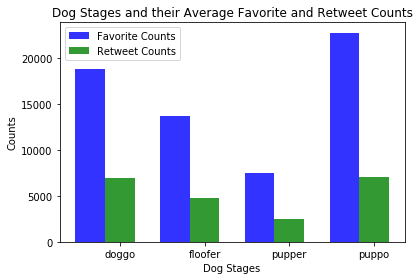

In [363]:
import numpy as np
import matplotlib.pyplot as plt

#data to plot
dog_stage_counts
n_groups = 4

#create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, dog_stage_counts.favorite_count, bar_width,
                alpha=opacity,
                color='b',
                label='Favorite Counts')

rects2 = plt.bar(index + bar_width, dog_stage_counts.retweet_count, bar_width,
                alpha=opacity,
                color='g',
                label='Retweet Counts')

plt.xlabel('Dog Stages')
plt.ylabel('Counts')
plt.title('Dog Stages and their Average Favorite and Retweet Counts')
plt.xticks(index + bar_width, ('doggo', 'floofer', 'pupper', 'puppo'))
plt.legend()

plt.tight_layout()
plt.show()